In [30]:
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, cohen_kappa_score

In [12]:
# Ler o arquivo CSV com as colunas na primeira linha
df = pd.read_csv('../data/diabetes_prediction_dataset.csv')

In [13]:
df = df.drop('gender', axis=1)
df = df.drop('smoking_history', axis=1)

In [14]:

# Separar as características (features) e a classe (label)
X = df.iloc[:, :-1].values  # Todas as colunas exceto a última
y = df.iloc[:, -1].values   # Última coluna

In [15]:
# Dividir os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Normalizar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
# Redimensionar os dados para o formato esperado pelo LSTM (samples, time steps, features)
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [18]:
# Construir o modelo LSTM
model = Sequential([
    LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

In [19]:
# Compilar o modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [20]:
# Treinar o modelo
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/100


2500/2500 [==============================] - 19s 6ms/step - loss: 0.1521 - accuracy: 0.9534 - val_loss: 0.1152 - val_accuracy: 0.9597
Epoch 2/100
2500/2500 [==============================] - 11s 4ms/step - loss: 0.1142 - accuracy: 0.9611 - val_loss: 0.1140 - val_accuracy: 0.9603
Epoch 3/100
2500/2500 [==============================] - 11s 4ms/step - loss: 0.1129 - accuracy: 0.9616 - val_loss: 0.1116 - val_accuracy: 0.9622
Epoch 4/100
2500/2500 [==============================] - 11s 5ms/step - loss: 0.1092 - accuracy: 0.9633 - val_loss: 0.1065 - val_accuracy: 0.9633
Epoch 5/100
2500/2500 [==============================] - 11s 5ms/step - loss: 0.1047 - accuracy: 0.9651 - val_loss: 0.1024 - val_accuracy: 0.9654
Epoch 6/100
2500/2500 [==============================] - 12s 5ms/step - loss: 0.1025 - accuracy: 0.9654 - val_loss: 0.1000 - val_accuracy: 0.9668
Epoch 7/100
2500/2500 [==============================] - 11s 5ms/step - loss: 0.1010 - accuracy: 0.9659 - val_loss: 0.0985

In [21]:
# Fazer previsões
predictions = model.predict(X_test).round()

625/625 [==============================] - 2s 2ms/step


In [22]:
# Avaliação do modelo
print(classification_report(y_test, predictions))
print("Accuracy:", accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99     18292
           1       0.99      0.68      0.81      1708

    accuracy                           0.97     20000
   macro avg       0.98      0.84      0.90     20000
weighted avg       0.97      0.97      0.97     20000

Accuracy: 0.9722


In [23]:
# Matriz de confusão e Índice Kappa
conf_matrix = confusion_matrix(y_test, predictions)
kappa_score = cohen_kappa_score(y_test, predictions)

In [24]:
print("Matriz de Confusão:")
print(conf_matrix)
print("Índice Kappa:", kappa_score)

Matriz de Confusão:
[[18280    12]
 [  544  1164]]
Índice Kappa: 0.7927800391422107


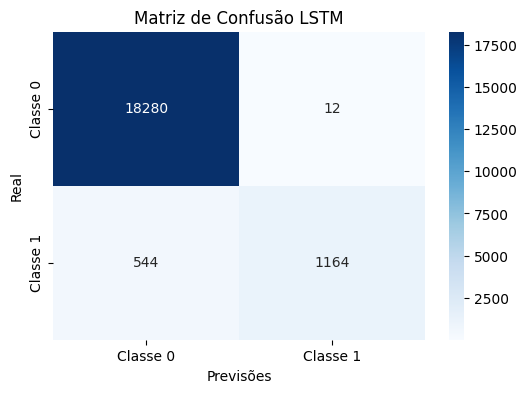

In [31]:
# Criar um plot da matriz de confusão usando seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Previsões')
plt.ylabel('Real')
plt.title('Matriz de Confusão LSTM')
plt.show()